%ls

# importing all required modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
# RESEARCH LINK: https://arxiv.org/pdf/1612.02903v1
# GIT LINK : https://github.com/janZub-AI/EmotionDetectionVGG


from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, Cropping2D
from keras.layers import Flatten, Dropout, Dense, BatchNormalization, Activation

from keras.layers.experimental.preprocessing import RandomCrop
from keras.optimizers import Adam, SGD
from keras.initializers import GlorotNormal, HeNormal

import tensorflow as tf

In [3]:
train_dir="C:/Users/91911/Downloads/fer2013/train"
test_dir='C:/Users/91911/Downloads/fer2013//test'

In [4]:
def load_dataset(directory):
  image_paths=[]
  labels=[]

  for label in os.listdir(directory):
    for filename in os.listdir(directory+"/"+label):
      image_path=os.path.join(directory,label,filename)
      image_paths.append(image_path)
      labels.append(label)
    print(label,"compelted")

  return image_paths, labels

In [5]:
train=pd.DataFrame()
train['image'], train['label']=load_dataset(train_dir)

train=train.sample(frac=1).reset_index(drop=True)
train.head()

angry compelted
disgust compelted
fear compelted
happy compelted
neutral compelted
sad compelted
surprise compelted


,image,label
0,C:/Users/91911/Downloads/fer2013/train\happy\T...,happy
1,C:/Users/91911/Downloads/fer2013/train\surpris...,surprise
2,C:/Users/91911/Downloads/fer2013/train\happy\T...,happy
3,C:/Users/91911/Downloads/fer2013/train\fear\Tr...,fear
4,C:/Users/91911/Downloads/fer2013/train\neutral...,neutral


In [6]:
test=pd.DataFrame()
test['image'], test['label']=load_dataset(test_dir)
test.head()

angry compelted
disgust compelted
fear compelted
happy compelted
neutral compelted
sad compelted
surprise compelted


,image,label
0,C:/Users/91911/Downloads/fer2013//test\angry\P...,angry
1,C:/Users/91911/Downloads/fer2013//test\angry\P...,angry
2,C:/Users/91911/Downloads/fer2013//test\angry\P...,angry
3,C:/Users/91911/Downloads/fer2013//test\angry\P...,angry
4,C:/Users/91911/Downloads/fer2013//test\angry\P...,angry


In [7]:
label_count=train['label'].value_counts()

In [8]:
print(label_count)

label
happy       7215
neutral     4965
sad         4830
fear        4097
angry       3995
surprise    3171
disgust      436
Name: count, dtype: int64


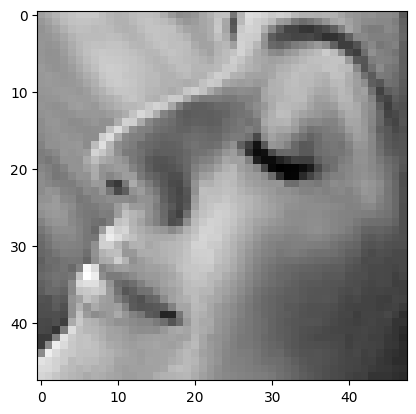

In [9]:
from PIL import Image
img=Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

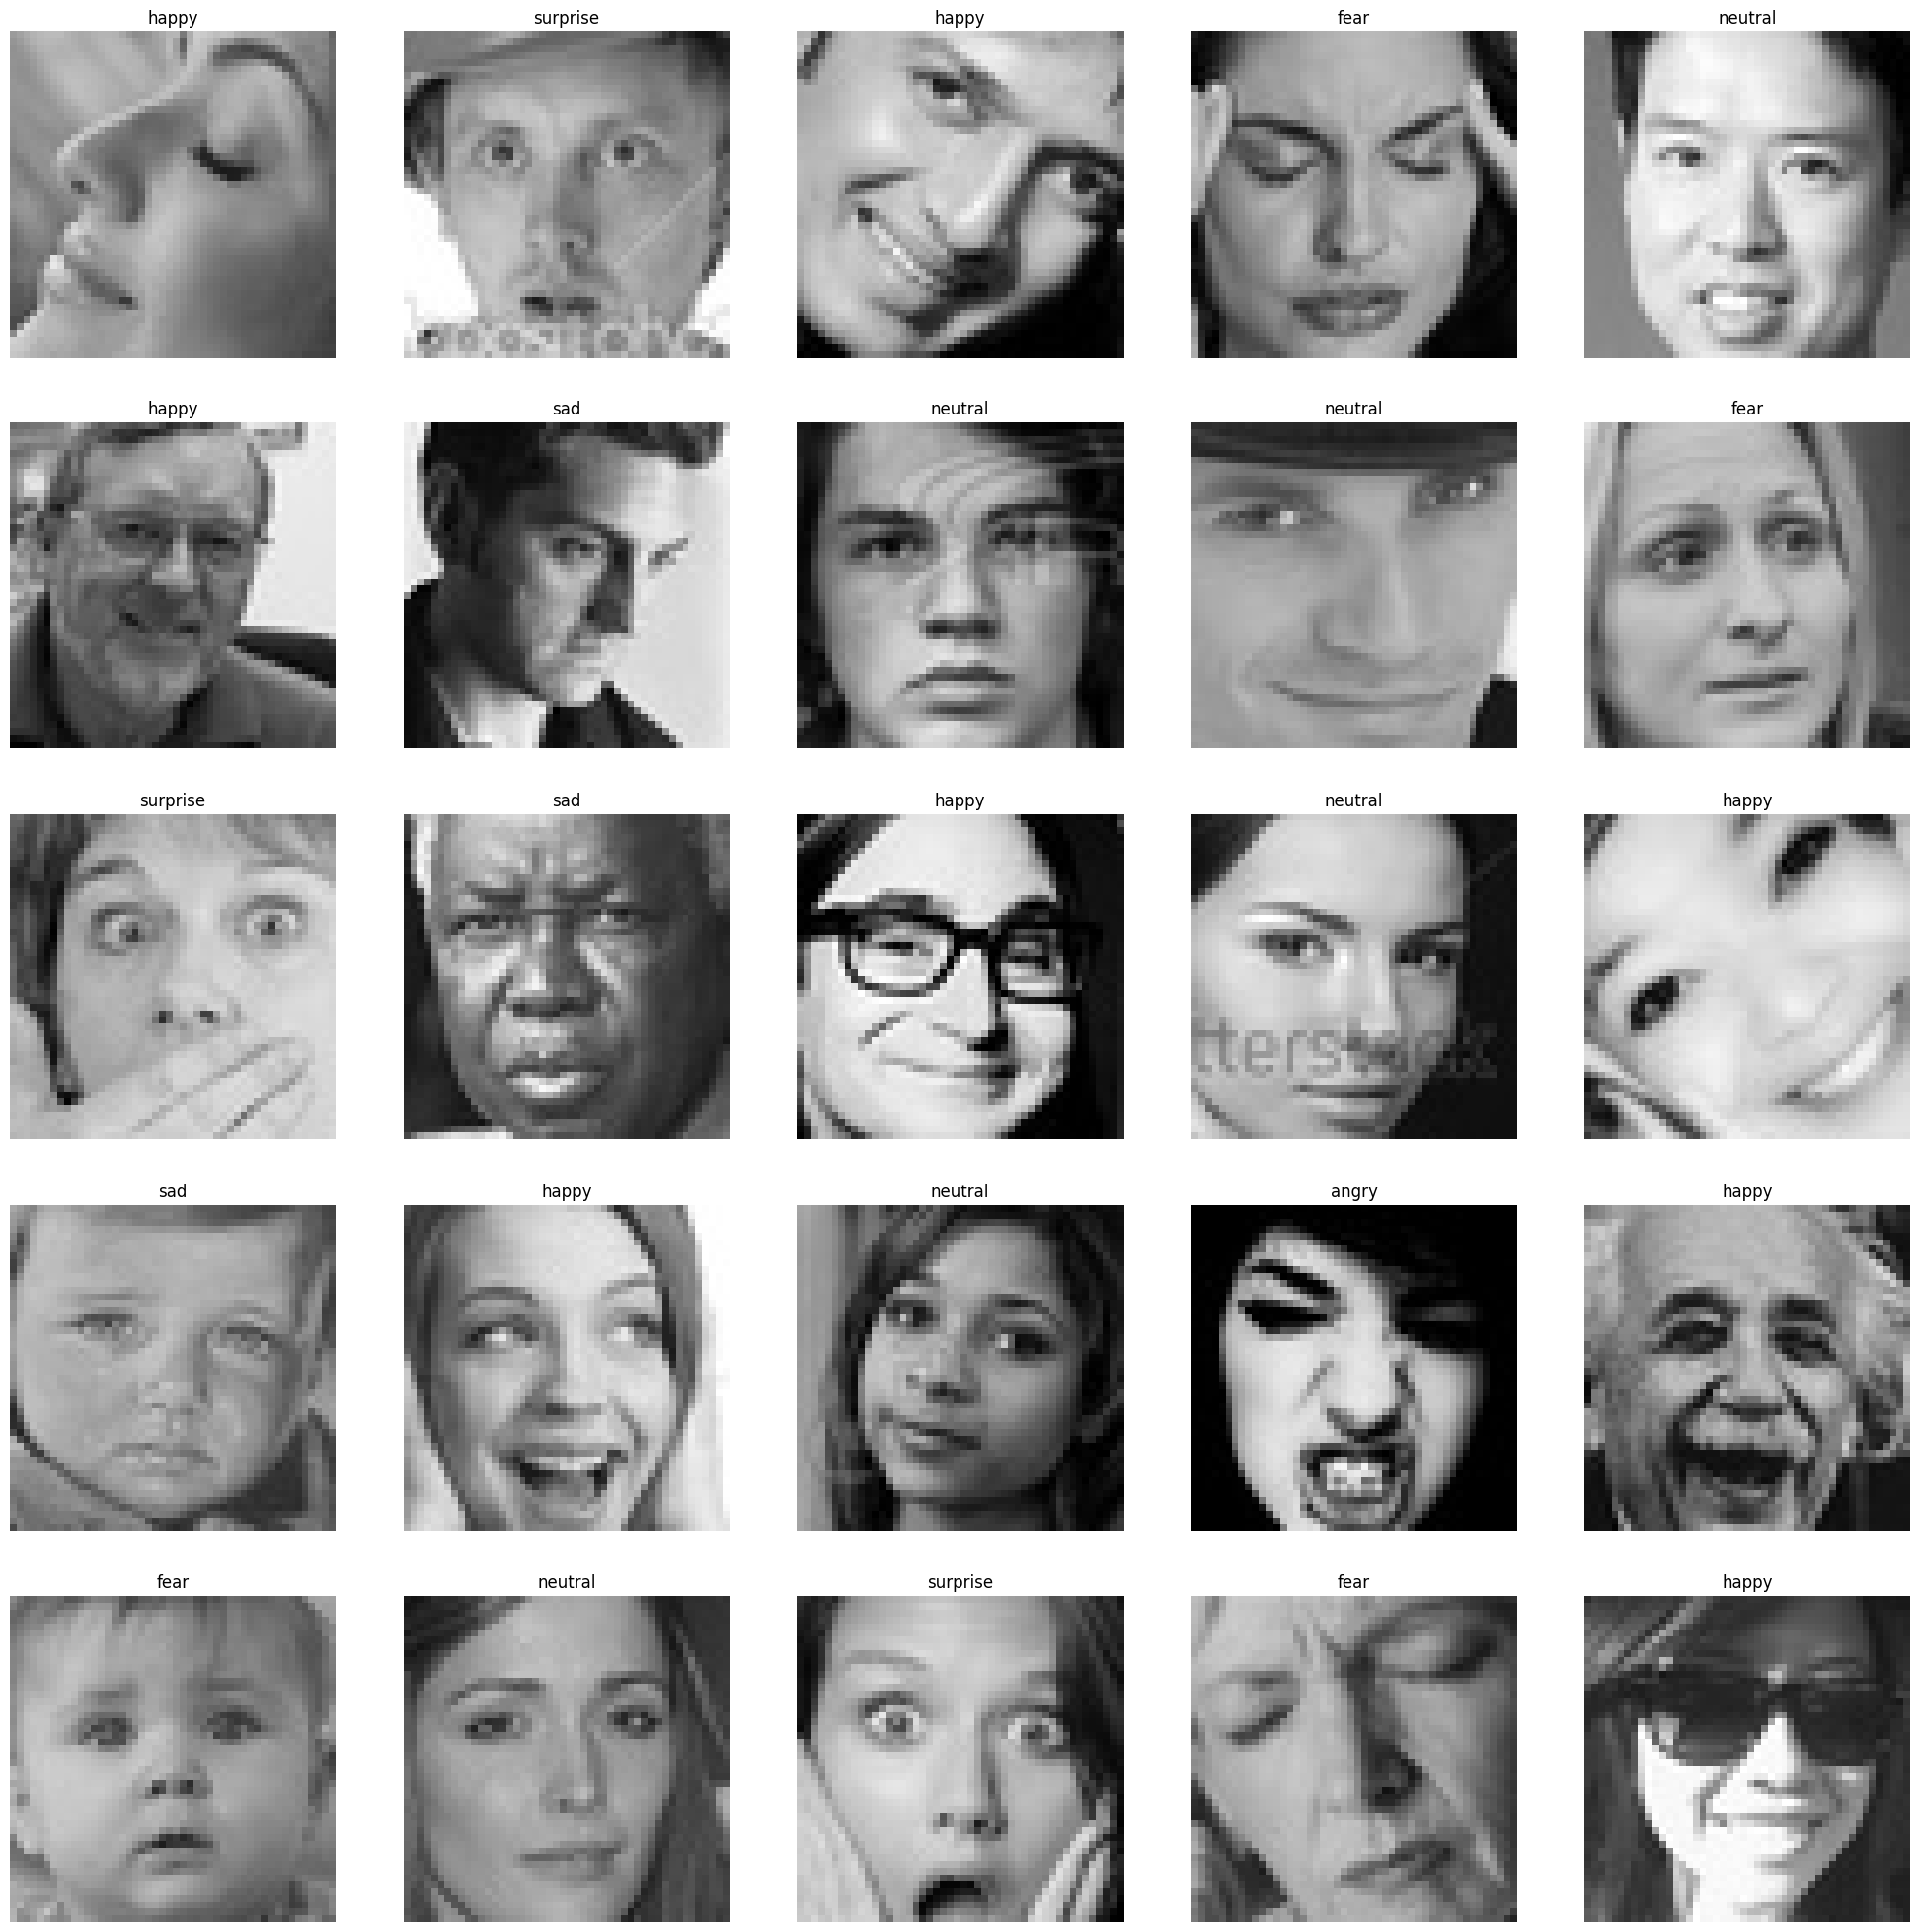

In [10]:
plt.figure(figsize=(25,25))
files=train.iloc[0:25]

for index,file,label in files.itertuples():
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

In [11]:
def extract_features(images):
  features=[]
  for image in tqdm(images):
    img=load_img(image,grayscale=True)
    img=np.array(img)
    features.append(img)
  features=np.array(features)
  features=features.reshape(len(features),48,48,1)
  return features


In [12]:
train_features=extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [13]:
test_features=extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [14]:
x_train=train_features/255.0
x_test=test_features/255.0

In [15]:
len(x_test[1])

48

In [16]:
x_train[1]

array([[[0.47058824],
        [0.4627451 ],
        [0.49019608],
        ...,
        [0.0745098 ],
        [0.16078431],
        [0.25098039]],

       [[0.44705882],
        [0.4745098 ],
        [0.47843137],
        ...,
        [0.08627451],
        [0.10588235],
        [0.11764706]],

       [[0.45882353],
        [0.49411765],
        [0.47058824],
        ...,
        [0.10980392],
        [0.10196078],
        [0.10588235]],

       ...,

       [[0.86666667],
        [0.92941176],
        [0.44313725],
        ...,
        [0.66666667],
        [0.82745098],
        [0.95294118]],

       [[0.84705882],
        [0.91764706],
        [0.6627451 ],
        ...,
        [0.56470588],
        [0.44313725],
        [0.65490196]],

       [[0.78431373],
        [0.82745098],
        [0.76078431],
        ...,
        [0.48235294],
        [0.44313725],
        [0.60784314]]])

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['label'])
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [18]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test, num_classes=7)

In [19]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
input_shape=(48,48,1)
output_class=7


In [21]:
initializer = GlorotNormal()
'''# The same initializer
if(hp['initializer'] == 'glorot'):
    initializer = GlorotNormal()
else:
    initializer = HeNormal()
'''

activation = Activation('relu')
'''#The same activation for all hidden is relu
if(hp['activation'] == 'relu'):
    activation = Activation('relu')
else:
    activation = PReLU()
'''
model2 = Sequential()
model2.add(RandomCrop(48,48))
model2.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = (48,48,1), padding = 'same', kernel_initializer=initializer))
model2.add(BatchNormalization())
model2.add(activation)

model2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model2.add(BatchNormalization())
model2.add(activation)
model2.add(MaxPooling2D((2, 2)))

model2.add(Dropout(0.5))
model2.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model2.add(BatchNormalization())
model2.add(activation)
model2.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model2.add(BatchNormalization())
model2.add(activation)
model2.add(MaxPooling2D((2, 2)))


model2.add(Dropout(0.5))
model2.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model2.add(BatchNormalization())
model2.add(activation)
model2.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model2.add(BatchNormalization())
model2.add(activation)
model2.add(MaxPooling2D((2, 2)))


model2.add(Dropout(0.5))
model2.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model2.add(BatchNormalization())
model2.add(activation)
model2.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model2.add(BatchNormalization())
model2.add(activation)
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dropout(0.5))
model2.add(Dense(1024))
model2.add(BatchNormalization())
model2.add(activation)

model2.add(Dense(7, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [70]:
history2=model2.fit(x=x_train,y=y_train,epochs=50,batch_size=128, validation_data=(x_test,y_test))

Epoch 1/50
225/225 [==============================] - 383s 2s/step - loss: 2.0858 - accuracy: 0.2974 - val_loss: 2.1592 - val_accuracy: 0.1743
Epoch 2/50
225/225 [==============================] - 391s 2s/step - loss: 1.5841 - accuracy: 0.3946 - val_loss: 2.0023 - val_accuracy: 0.2381
Epoch 3/50
225/225 [==============================] - 393s 2s/step - loss: 1.4553 - accuracy: 0.4502 - val_loss: 1.4632 - val_accuracy: 0.4696
Epoch 4/50
225/225 [==============================] - 391s 2s/step - loss: 1.3860 - accuracy: 0.4750 - val_loss: 1.4633 - val_accuracy: 0.4739
Epoch 5/50
225/225 [==============================] - 392s 2s/step - loss: 1.3407 - accuracy: 0.4939 - val_loss: 1.4124 - val_accuracy: 0.4891
Epoch 6/50
225/225 [==============================] - 393s 2s/step - loss: 1.3085 - accuracy: 0.5103 - val_loss: 1.6698 - val_accuracy: 0.4496
Epoch 7/50
225/225 [==============================] - 393s 2s/step - loss: 1.2807 - accuracy: 0.5162 - val_loss: 1.3624 - val_accuracy: 0.5143

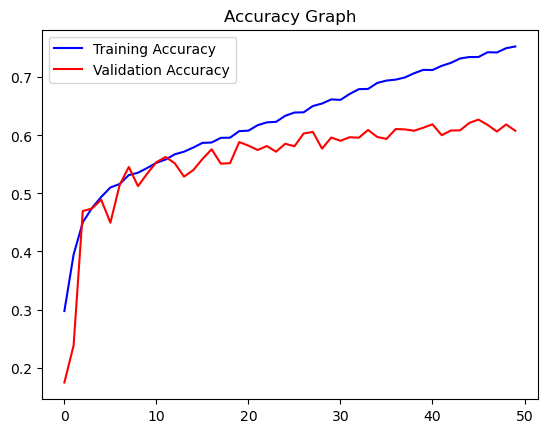

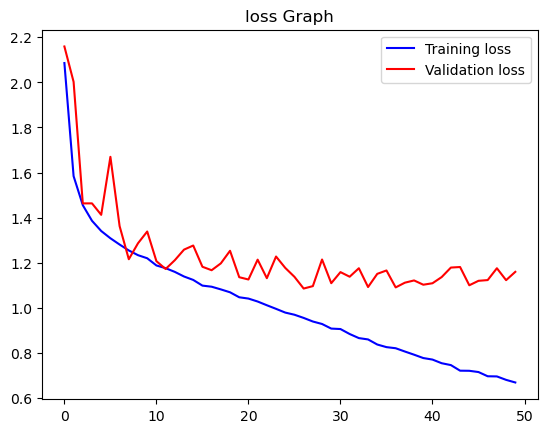

In [72]:
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()


loss=history2.history['loss']
val_loss=history2.history['val_loss']
epochs=range(len(loss))

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('loss Graph')
plt.legend()

plt.show()




Original Output neutral
1/1 [==============================] - 1s 973ms/step
predicted output:  happy


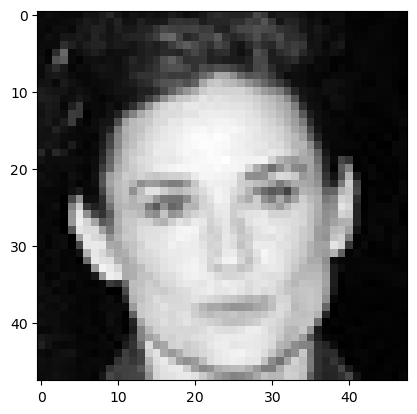

In [73]:
image_index=random.randint(0,len(test))
print("Original Output",test['label'][image_index])
pred=model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label=le.inverse_transform([pred.argmax()])[0]
print("predicted output: ",prediction_label)

plt.imshow(x_test[image_index].reshape(48,48),cmap='gray');

In [22]:
initializer = GlorotNormal()
'''# The same initializer
if(hp['initializer'] == 'glorot'):
    initializer = GlorotNormal()
else:
    initializer = HeNormal()
'''

activation = Activation('relu')
'''#The same activation for all hidden is relu
if(hp['activation'] == 'relu'):
    activation = Activation('relu')
else:
    activation = PReLU()
'''
model3 = Sequential()
model3.add(RandomCrop(48,48))
model3.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = (48,48,1), padding = 'same', kernel_initializer=initializer))
model3.add(BatchNormalization())
model3.add(activation)

model3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model3.add(BatchNormalization())
model3.add(activation)
model3.add(MaxPooling2D((2, 2)))

model3.add(Dropout(0.5))
model3.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model3.add(BatchNormalization())
model3.add(activation)
model3.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model3.add(BatchNormalization())
model3.add(activation)
model3.add(MaxPooling2D((2, 2)))


model3.add(Dropout(0.5))
model3.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model3.add(BatchNormalization())
model3.add(activation)
model3.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model3.add(BatchNormalization())
model3.add(activation)
model3.add(MaxPooling2D((2, 2)))


model3.add(Dropout(0.5))
model3.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model3.add(BatchNormalization())
model3.add(activation)
model3.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', kernel_initializer=initializer))
model3.add(BatchNormalization())
model3.add(activation)
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())

model3.add(Dropout(0.5))
model3.add(Dense(1024))
model3.add(BatchNormalization())
model3.add(activation)

model3.add(Dense(7, activation='sigmoid'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [22]:
history3=model3.fit(x=x_train,y=y_train,epochs=50,batch_size=128, validation_data=(x_test,y_test))

Epoch 1/50


225/225 [==============================] - 394s 2s/step - loss: 2.1276 - accuracy: 0.2768 - val_loss: 1.9393 - val_accuracy: 0.2921
Epoch 2/50
225/225 [==============================] - 382s 2s/step - loss: 1.6136 - accuracy: 0.3837 - val_loss: 1.9176 - val_accuracy: 0.3155
Epoch 3/50
225/225 [==============================] - 387s 2s/step - loss: 1.4722 - accuracy: 0.4399 - val_loss: 1.5337 - val_accuracy: 0.3983
Epoch 4/50
225/225 [==============================] - 390s 2s/step - loss: 1.3985 - accuracy: 0.4714 - val_loss: 1.4417 - val_accuracy: 0.4649
Epoch 5/50
225/225 [==============================] - 392s 2s/step - loss: 1.3513 - accuracy: 0.4887 - val_loss: 1.7406 - val_accuracy: 0.3782
Epoch 6/50
225/225 [==============================] - 390s 2s/step - loss: 1.3282 - accuracy: 0.4997 - val_loss: 1.3379 - val_accuracy: 0.5091
Epoch 7/50
225/225 [==============================] - 391s 2s/step - loss: 1.2855 - accuracy: 0.5174 - val_loss: 1.2724 - val_accuracy: 0.53

In [23]:
model3.save("model2.h5") 

In [23]:
from keras.models import load_model
model2=load_model('model2.h5')

225/225 [==============================] - 36s 154ms/step


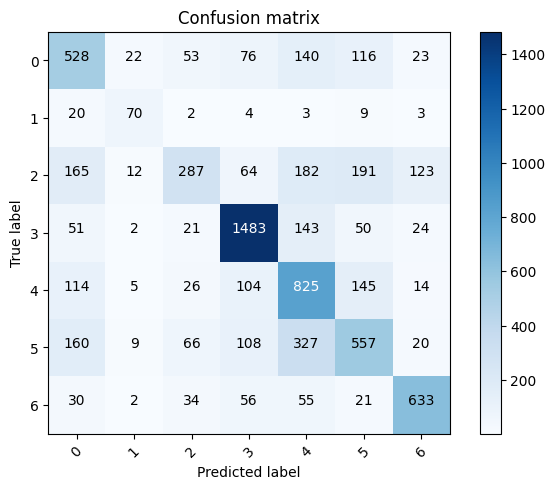

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model2.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

In [25]:
score, acc = model2.evaluate(x_test, y_test, batch_size=100)
print('Test score:', score)
print("Test accuracy:", acc)

72/72 [==============================] - 33s 444ms/step - loss: 1.1887 - accuracy: 0.6106
Test score: 1.188701868057251
Test accuracy: 0.6106157898902893
